In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
cdata_mex_pairs=pd.read_csv('../output_data/complexity_data_mex_pairs_all.csv')

#RCA weighted metrics
cdata_mex_pairs['GPDperCAP_rca1']=cdata_mex_pairs['GPDperCAP']*cdata_mex_pairs['rca1']
cdata_mex_pairs['discovery_factor_rca1']=cdata_mex_pairs['discovery_factor']*cdata_mex_pairs['rca1']
cdata_mex_pairs['degree_centrality_rca1']=cdata_mex_pairs['degree_centrality']*cdata_mex_pairs['rca1']
cdata_mex_pairs['eigenvecor_centrality_rca1']=cdata_mex_pairs['eigenvecor_centrality']*cdata_mex_pairs['rca1']
cdata_mex_pairs['closeness_centrality_rca1']=cdata_mex_pairs['closeness_centrality']*cdata_mex_pairs['rca1']


cdata_mex_pairs_under_trans=cdata_mex_pairs.loc[cdata_mex_pairs['M_num'].isin([0,1])]
cdata_mex_pairs_under_trans

,Unnamed: 0.1,Unnamed: 0,year_pair,location_code,Product,export,eci,pci,density,coi,...,ied,discovery_factor,degree_centrality,eigenvecor_centrality,closeness_centrality,GPDperCAP_rca1,discovery_factor_rca1,degree_centrality_rca1,eigenvecor_centrality_rca1,closeness_centrality_rca1
0,0,0,2004_2009,Aguascalientes,112511,202.0,0.848230,-0.046626,0.466068,-0.338408,...,0.0,0.000000,0.765755,0.028372,0.810212,0.000000,0.000000,0.000000,0.000000,0.000000
1,1,1,2004_2009,Aguascalientes,112512,202.0,0.848230,-1.941842,0.427237,-0.338408,...,0.0,1.091584,0.834721,0.030609,0.858163,0.011126,0.102243,0.078184,0.002867,0.080380
2,2,2,2004_2009,Aguascalientes,114111,202.0,0.848230,-5.235022,0.431109,-0.338408,...,0.0,0.000000,0.827586,0.030299,0.852941,0.000000,0.000000,0.000000,0.000000,0.000000
3,3,3,2004_2009,Aguascalientes,114112,202.0,0.848230,-3.364327,0.423400,-0.338408,...,0.0,1.104863,0.829964,0.030509,0.854675,0.000000,0.000000,0.000000,0.000000,0.000000
4,4,4,2004_2009,Aguascalientes,114113,202.0,0.848230,0.620588,0.459760,-0.338408,...,0.0,1.098617,0.784780,0.029064,0.822896,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109540,109540,109540,2004_2019,Zacatecas,811199,202.0,-0.424094,2.200087,0.237546,0.242616,...,0.0,0.000000,0.982164,0.035877,0.982477,0.035067,0.000000,0.445798,0.016284,0.445940
109542,109542,109542,2004_2019,Zacatecas,811219,202.0,-0.424094,1.564823,0.236639,0.242616,...,0.0,0.000000,0.985731,0.035992,0.985932,0.037608,0.000000,0.479844,0.017521,0.479942
109546,109546,109546,2004_2019,Zacatecas,811314,202.0,-0.424094,1.223533,0.230328,0.242616,...,0.0,25.308882,0.979786,0.035807,0.980186,0.020605,6.749893,0.261309,0.009550,0.261416
109557,109557,109557,2004_2019,Zacatecas,812210,202.0,-0.424094,1.346160,0.197752,0.242616,...,0.0,0.000000,0.952438,0.034934,0.954597,0.028428,0.000000,0.350461,0.012854,0.351256


In [3]:
cdata_mex_pairs['discovery_factor'].isna().any()

False

In [4]:
low_range_array=[0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,1]

for low_range in low_range_array:

    cdata_mex_pairs['M_num_relaxed_'+str(low_range).replace('.','_')] = cdata_mex_pairs.apply(lambda row: 1 if row['rca1'] < low_range and row['rca2'] > 1 else (0 if row['rca1'] < low_range and row['rca2'] < low_range else None), axis=1)

low_range=0.85   

cdata_mex_pairs[['M_num_relaxed_'+str(low_range).replace('.','_'),'rca1','rca2']].loc[cdata_mex_pairs['M_num_relaxed_'+str(low_range).replace('.','_')]==1]

,M_num_relaxed_0_85,rca1,rca2
34,1.0,0.000000,1.427550
40,1.0,0.000000,1.025312
42,1.0,0.000000,4.034382
55,1.0,0.000000,2.577522
56,1.0,0.000000,4.034382
...,...,...,...
109505,1.0,0.745498,1.577904
109513,1.0,0.356331,1.239719
109522,1.0,0.547625,1.056923
109525,1.0,0.146570,1.117214


Optimization terminated successfully.
         Current function value: 0.348236
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.298939
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.292486
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.267592
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.186440
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.329739
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.223861
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.310609
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.320209
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.335

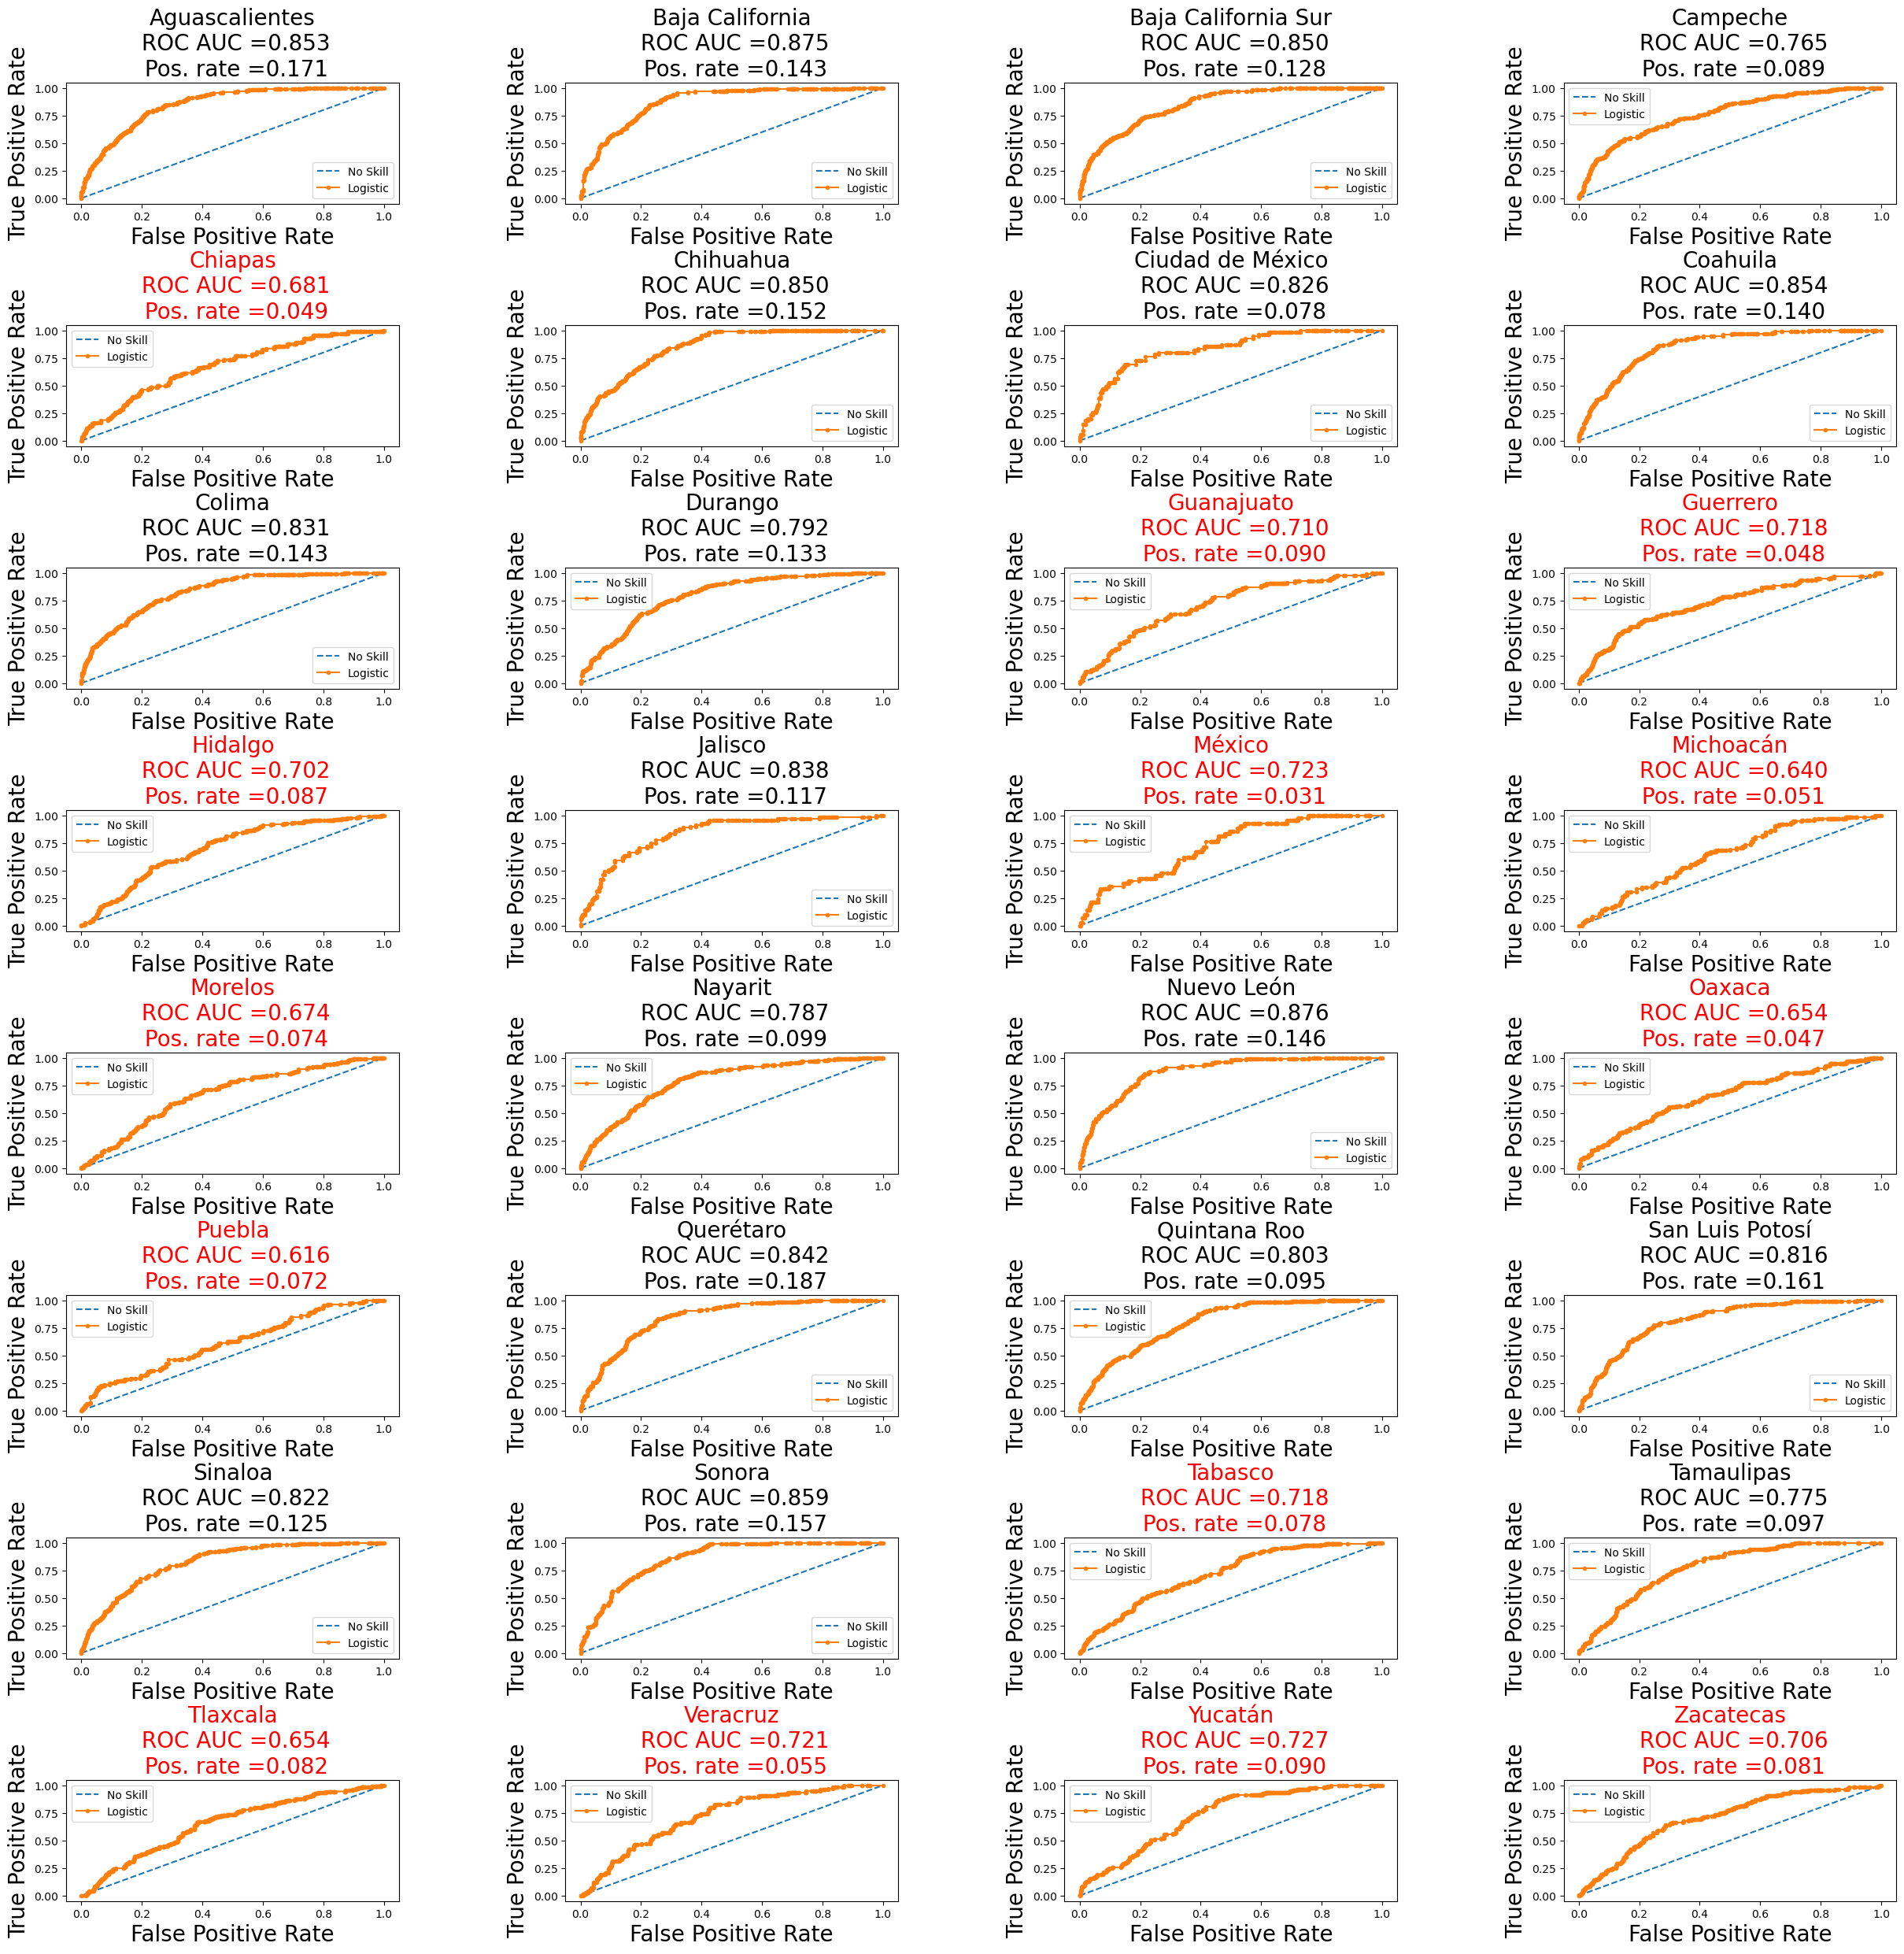

,Estado,Years,density,density_std_err,density_p_value,discovery_factor,discovery_factor_std_err,discovery_factor_p_value,GPDperCAP_rca1,GPDperCAP_rca1_std_err,...,closeness_centrality_p_value,eigenvecor_centrality,eigenvecor_centrality_std_err,eigenvecor_centrality_p_value,eigenvecor_centrality_rca1,eigenvecor_centrality_rca1_std_err,eigenvecor_centrality_rca1_p_value,Intercept,Intercept_std_err,Intercept_p_value
0,Aguascalientes,All,-1.776059,3.255488,5.853695e-01,0.598054,0.062679,1.407026e-21,25.381908,46.156629,...,0.181791,505.203594,278.806249,0.069982,-129.497895,170.120579,0.446530,-2.703191,2.806946,0.335529
1,Baja California,All,3.969711,2.374463,9.455683e-02,0.884348,0.095951,3.063588e-20,-23.618594,84.633442,...,0.054839,450.842067,230.277647,0.050251,-32.097548,353.170216,0.927585,0.431497,3.170135,0.891732
2,Baja California Sur,All,4.295221,1.636046,8.655570e-03,0.545067,0.045585,5.949859e-33,75.405432,31.630999,...,0.213065,237.485614,178.355496,0.183015,-390.164295,154.461092,0.011538,-2.241561,2.535145,0.376591
3,Campeche,All,9.626717,2.140787,6.898003e-06,0.227693,0.031408,4.184105e-13,0.150642,2.275655,...,0.034084,444.433374,212.340604,0.036347,-28.482308,78.747410,0.717582,-0.043278,2.678858,0.987110
4,Chiapas,All,11.547880,3.038389,1.443120e-04,0.121582,0.036761,9.418141e-04,170.492088,90.930887,...,0.006554,400.580520,152.580752,0.008656,-281.922643,151.874555,0.063413,1.581260,2.664241,0.552838
5,Chihuahua,All,-2.020143,1.834406,2.707870e-01,0.673352,0.074848,2.334277e-19,-101.546335,62.983473,...,0.355870,-64.598835,134.300203,0.630514,281.536636,216.973614,0.194438,-6.025988,2.444010,0.013678
6,Ciudad de México,All,7.634980,2.663755,4.153699e-03,0.384730,0.064473,2.412004e-09,5.952971,17.831006,...,0.004194,371.444102,174.652619,0.033440,23.080289,153.753453,0.880676,6.576627,4.199194,0.117310
7,Coahuila,All,-0.681449,1.999947,7.333041e-01,0.894057,0.098138,8.219826e-20,17.353974,39.104121,...,0.174786,180.760804,135.531126,0.182295,-246.097720,205.188511,0.230383,0.518300,2.430951,0.831164
8,Colima,All,3.098851,1.918439,1.062462e-01,0.560898,0.051928,3.385817e-27,-36.646229,94.595687,...,0.029892,555.056242,246.289706,0.024217,56.508585,335.453510,0.866226,0.587599,2.692796,0.827264
9,Durango,All,3.540793,2.273264,1.193325e-01,0.355216,0.043938,6.247428e-16,-25.008316,75.602678,...,0.669410,1.698280,156.959180,0.991367,59.061089,229.591897,0.796991,-7.101401,2.488600,0.004323


In [10]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

Estados=cdata_mex_pairs['location_code'].unique()

years_pairs=cdata_mex_pairs['year_pair'].unique()

years=['All']



features=['eci','pci','density','rca1','discovery_factor','discovery_factor_rca1',
          'GPDperCAP','GPDperCAP_rca1',
          'closeness_centrality',
          'eigenvecor_centrality',
          'degree_centrality',
          ]
features=['density','discovery_factor',
          'GPDperCAP_rca1',
          'closeness_centrality',
          'eigenvecor_centrality','eigenvecor_centrality_rca1']




est_yeas=[]
for ye in years:
    for estado in Estados:
        est_yeas.append([estado,ye])
        
regression_df=pd.DataFrame(est_yeas,columns=(['Estado','Years']))

for param in features:
    regression_df[param]=0
    regression_df[param+'_std_err']=0
    regression_df[param+'_p_value']=0

# Initiate figure
fig, axs = plt.subplots(8,4, figsize=(30, 30), facecolor='w', edgecolor='k')
# fig, axs = plt.subplots(3,3, figsize=(15, 15), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 1, wspace=0.5)

axs = axs.ravel()
target='M_num'
df=cdata_mex_pairs_under_trans.copy()
for i,Estado in enumerate(Estados):
    
    data_0=df.loc[(df['location_code']==Estado)][['location_code',target]+features]
    
    str_fit = target+' ~ '+features[0]
    
    for feat in features[1:]:
        str_fit=str_fit+'+'+feat
        
    x_logistic = data_0.loc[:, features].values
    
    y_logistic = data_0[target].values
    
    positive_rate=sum(y_logistic)/len(y_logistic)

    results=smf.logit(str_fit,data=data_0).fit()
    
    val_stderr=[]
    for param in results.params.keys():
        regression_df.loc[regression_df['Estado']==Estado,param]=results.params[param]
        regression_df.loc[regression_df['Estado']==Estado,param+'_std_err']=results.bse[param]
        regression_df.loc[regression_df['Estado']==Estado,param+'_p_value']=results.pvalues[param]
        
    #ROC
    
    # Genrate a Diagonal(Random Guess)
    ns_probs = [0 for _ in range(len(y_logistic))]
    # predict probabilities
    lr_probs = results.predict(data_0[features])
    # keep probabilities for the positive outcome only
    #lr_probs = lr_probs[:, 1]
    # calculate scores
    ns_auc = roc_auc_score(y_logistic, ns_probs)
    lr_auc = roc_auc_score(y_logistic, lr_probs)
    # summarize scores
   # print(Estado)
   # print('ROC AUC for Logistic Model =%.3f' % (lr_auc))
    # calculate roc curves
    ns_fpr, ns_tpr, _ = roc_curve(y_logistic, ns_probs)
    lr_fpr, lr_tpr, _ = roc_curve(y_logistic, lr_probs)
    # plot the roc curve for the model
    axs[i].plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
    axs[i].plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
    # axis labels
    axs[i].set_xlabel('False Positive Rate',size=20)
    axs[i].set_ylabel('True Positive Rate',size=20)
    # axis Title
    if lr_auc>0.75:
        tit_color='k'
    if lr_auc<0.75:
        tit_color='r'
        
    axs[i].set_title(Estado+'\n ROC AUC =%.3f' % (lr_auc)+'\n Pos. rate =%.3f' % (positive_rate),size=20,c=tit_color)
    # show the legend
    axs[i].legend()
        
plt.show()   

regression_df

         Current function value: 0.825420
         Iterations: 35
         Current function value: 0.632754
         Iterations: 35


C:\Users\L03537813\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\L03537813\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.682293
         Iterations: 35
         Current function value: 0.394809
         Iterations: 35


C:\Users\L03537813\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\L03537813\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.894089
         Iterations: 35
         Current function value: 1.661387
         Iterations: 35


C:\Users\L03537813\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\L03537813\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 1.104569
         Iterations: 35
         Current function value: 0.340776
         Iterations: 35


C:\Users\L03537813\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\L03537813\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.381649
         Iterations: 35
         Current function value: 2.014326
         Iterations: 35


C:\Users\L03537813\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\L03537813\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 1.153998
         Iterations: 35
         Current function value: 0.747686
         Iterations: 35


C:\Users\L03537813\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\L03537813\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.666062
         Iterations: 35
         Current function value: 6.831992
         Iterations: 35
         Current function value: 1.160926
         Iterations: 35


C:\Users\L03537813\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\L03537813\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
C:\Users\L03537813\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\L03537813\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
C:\Users\L03537813\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
C:\Users\L03537813\Anaconda3\lib\site-packages\statsmode

         Current function value: 0.768949
         Iterations: 35
         Current function value: inf
         Iterations: 35


C:\Users\L03537813\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1872: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


LinAlgError: Singular matrix

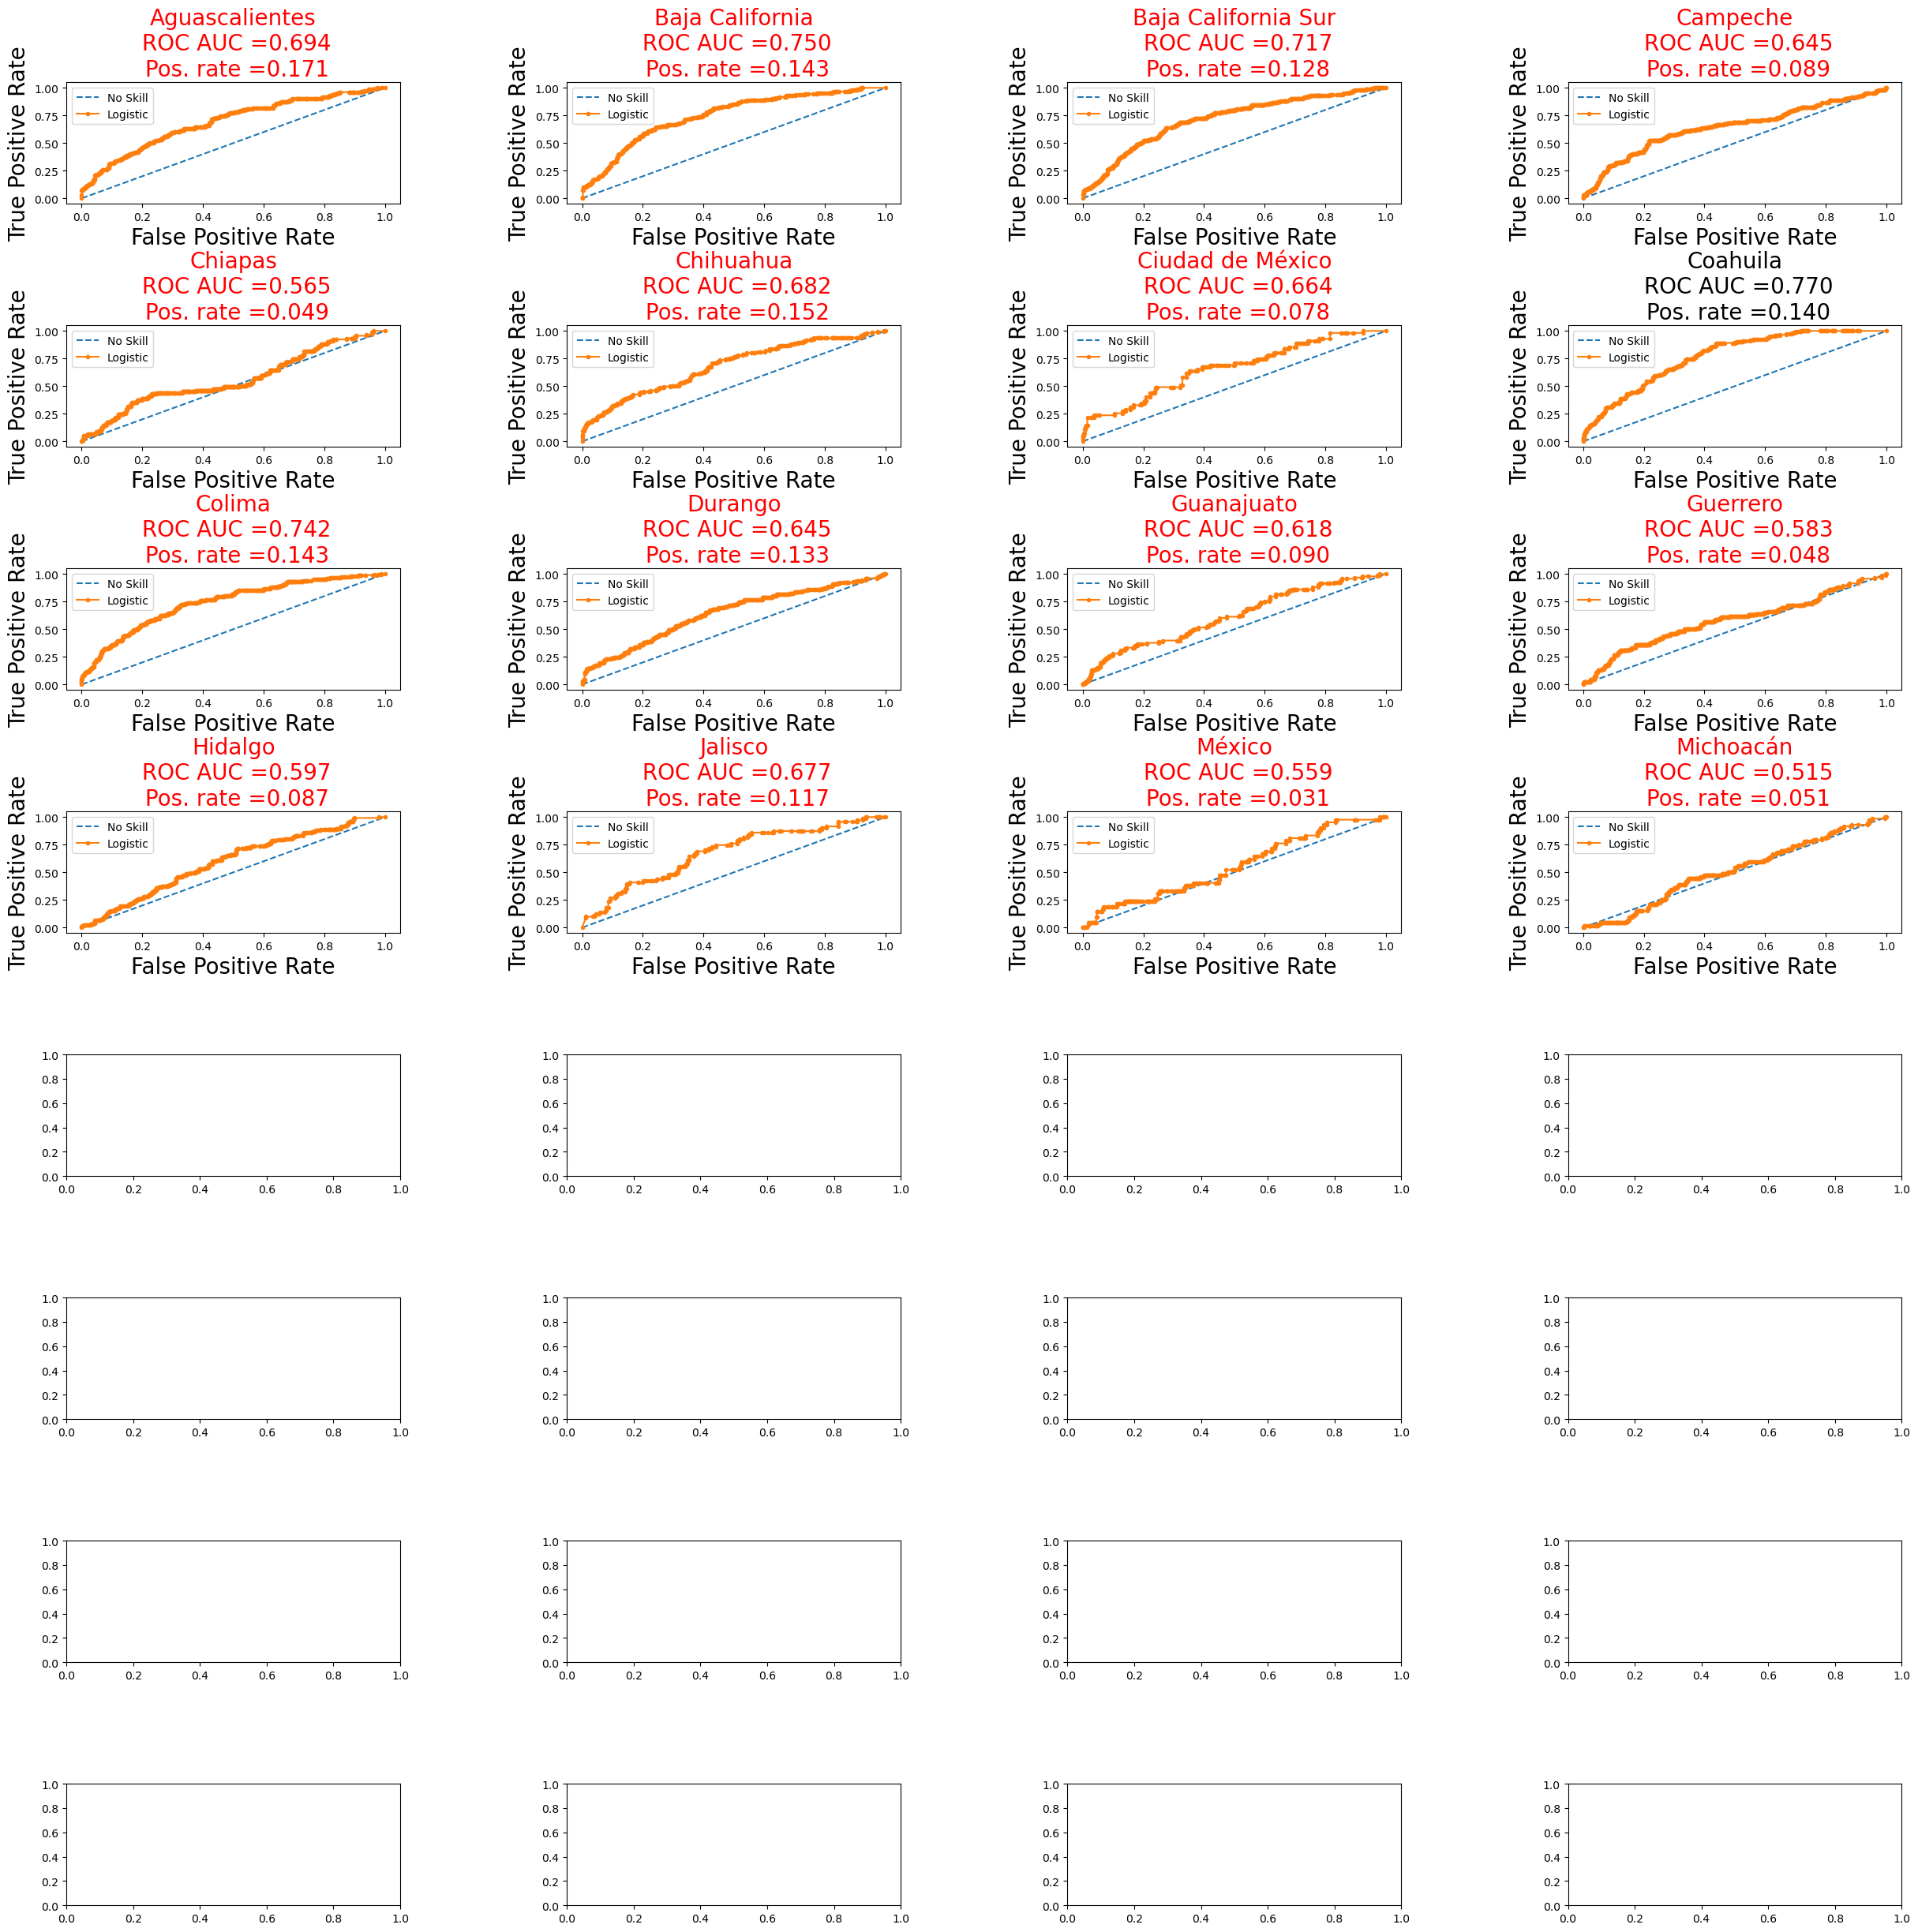

In [6]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

Estados=cdata_mex_pairs['location_code'].unique()

years_pairs=cdata_mex_pairs['year_pair'].unique()

years=['All']


#features=['Density','Discovery_Factor','RCA','GPDperCAP']

features=['eci','pci','density','rca1','discovery_factor_rca1',
          'GPDperCAP_rca1',
          'closeness_centrality_rca1',
          'eigenvecor_centrality_rca1',
          'degree_centrality_rca1',
          ]

#features=['eci','pci','density','rca1','GPDperCAP','closeness_centrality']


#features=['Nodes_Degree_Centrality','Nodes_Eigenvector_Centrality','Nodes_Closeness_Centrality','Density','Discovery_Factor','RCA','GPDperCAP']


est_yeas=[]
for ye in years:
    for estado in Estados:
        est_yeas.append([estado,ye])
        
regression_df=pd.DataFrame(est_yeas,columns=(['Estado','Years']))

for param in features:
    regression_df[param]=0
    regression_df[param+'_std_err']=0
    regression_df[param+'_p_value']=0

# Initiate figure
fig, axs = plt.subplots(8,4, figsize=(30, 30), facecolor='w', edgecolor='k')
# fig, axs = plt.subplots(3,3, figsize=(15, 15), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 1, wspace=0.5)

axs = axs.ravel()

for i,Estado in enumerate(Estados):
    
    data_0=cdata_mex_pairs_under_trans.loc[(cdata_mex_pairs_under_trans['location_code']==Estado)][['location_code','M']+features]
    
    
    str_fit = 'M_num ~ '+features[0]
    
    for feat in features[1:]:
        str_fit=str_fit+'+'+feat
        
    x_logistic = data_0.loc[:, features].values
    
    y = data_0['M'].values

    y_logistic_bool =np.array( [m=='Transition' for m in y])

    y_logistic_bool

    y_logistic=y_logistic_bool.astype(int)
    
    positive_rate=sum(y_logistic)/len(y_logistic)

    data_0['M_num']=y_logistic

    results=smf.logit(str_fit,data=data_0).fit()
    
    val_stderr=[]
    for param in results.params.keys():
        regression_df.loc[regression_df['Estado']==Estado,param]=results.params[param]
        regression_df.loc[regression_df['Estado']==Estado,param+'_std_err']=results.bse[param]
        regression_df.loc[regression_df['Estado']==Estado,param+'_p_value']=results.pvalues[param]
        
    #ROC
    
    # Genrate a Diagonal(Random Guess)
    ns_probs = [0 for _ in range(len(y_logistic))]
    # predict probabilities
    lr_probs = results.predict(data_0[features])
    # keep probabilities for the positive outcome only
    #lr_probs = lr_probs[:, 1]
    # calculate scores
    ns_auc = roc_auc_score(y_logistic, ns_probs)
    lr_auc = roc_auc_score(y_logistic, lr_probs)
    # summarize scores
   # print(Estado)
   # print('ROC AUC for Logistic Model =%.3f' % (lr_auc))
    # calculate roc curves
    ns_fpr, ns_tpr, _ = roc_curve(y_logistic, ns_probs)
    lr_fpr, lr_tpr, _ = roc_curve(y_logistic, lr_probs)
    # plot the roc curve for the model
    axs[i].plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
    axs[i].plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
    # axis labels
    axs[i].set_xlabel('False Positive Rate',size=20)
    axs[i].set_ylabel('True Positive Rate',size=20)
    # axis Title
    if lr_auc>0.75:
        tit_color='k'
    if lr_auc<0.75:
        tit_color='r'
        
    axs[i].set_title(Estado+'\n ROC AUC =%.3f' % (lr_auc)+'\n Pos. rate =%.3f' % (positive_rate),size=20,c=tit_color)
    # show the legend
    axs[i].legend()
        
plt.show()   

regression_df

Optimization terminated successfully.
         Current function value: 0.344027
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.290814
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.290340
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.266896
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.183536
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.325565
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.214955
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.301474
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.319300
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.335

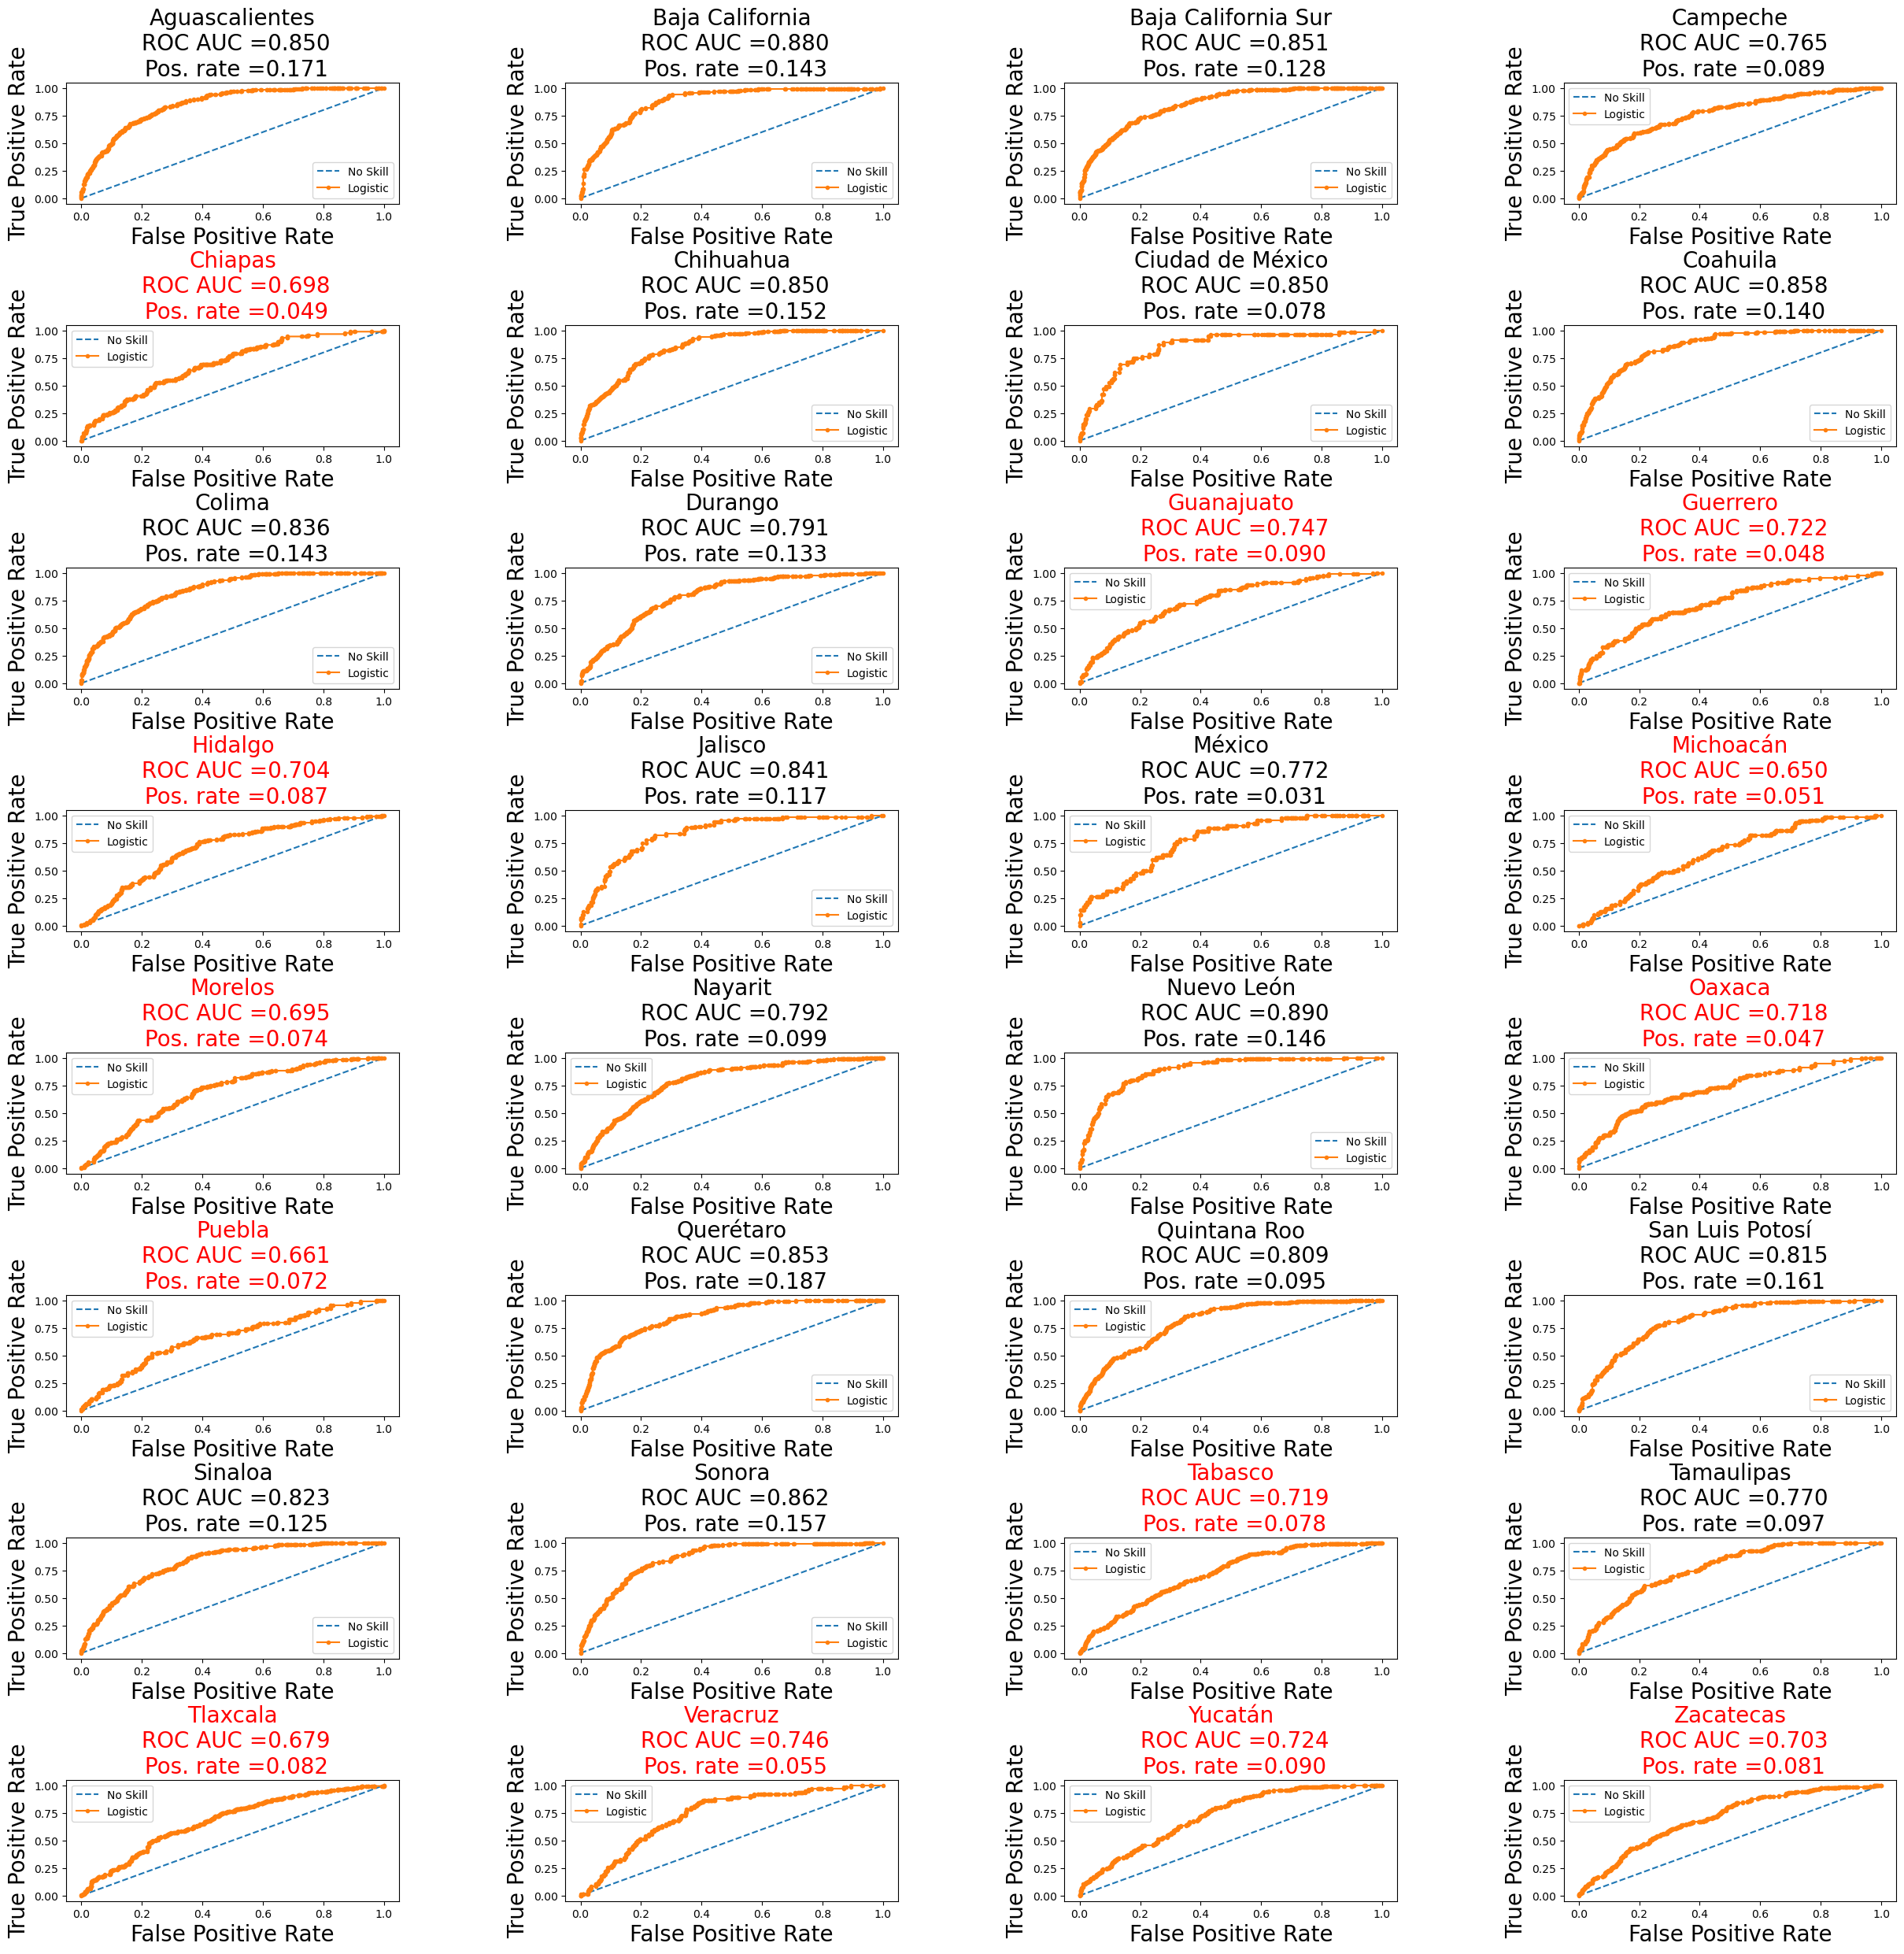

,Estado,Years,eci,eci_std_err,eci_p_value,pci,pci_std_err,pci_p_value,density,density_std_err,...,closeness_centrality_p_value,eigenvecor_centrality,eigenvecor_centrality_std_err,eigenvecor_centrality_p_value,degree_centrality_rca1,degree_centrality_rca1_std_err,degree_centrality_rca1_p_value,Intercept,Intercept_std_err,Intercept_p_value
0,Aguascalientes,All,2.233463,2.719608,0.411507,0.133509,0.046396,4.007650e-03,-0.285920,4.050607,...,0.509171,312.259061,283.036188,0.269920,-14.956551,9.958585,0.133129,-6.823949,3.506604,0.051651
1,Baja California,All,-7.466206,10.028124,0.456558,0.201618,0.052683,1.297270e-04,3.862242,2.846417,...,0.333063,233.778062,221.166853,0.290502,-17.302852,11.719182,0.139822,15.722624,23.746792,0.507911
2,Baja California Sur,All,2.876066,3.573645,0.420936,-0.001221,0.044354,9.780360e-01,7.109964,2.076863,...,0.305806,185.634534,176.966738,0.294187,-15.676909,6.093644,0.010092,12.744098,13.135301,0.331938
3,Campeche,All,0.804264,2.656985,0.762120,-0.003376,0.054877,9.509420e-01,9.875182,2.540752,...,0.057802,393.564228,204.960989,0.054834,-10.386044,8.332487,0.212599,-1.847170,2.847450,0.516526
4,Chiapas,All,-17.868300,6.557684,0.006434,0.060836,0.099815,5.422027e-01,15.320886,5.829256,...,0.021070,330.896819,144.016478,0.021583,-13.993299,5.434120,0.010022,12.462761,7.461084,0.094846
5,Chihuahua,All,1.141359,1.498651,0.446304,0.122463,0.044631,6.071845e-03,0.496359,2.225699,...,0.108449,-187.989923,142.367102,0.186682,-3.200834,9.312145,0.731052,-5.044442,3.031429,0.096103
6,Ciudad de México,All,3.248057,1.542267,0.035202,0.126626,0.121608,2.977541e-01,4.946253,5.166885,...,0.014222,359.543850,187.020985,0.054546,-4.145755,6.959470,0.551376,-4.827161,7.104824,0.496872
7,Coahuila,All,-1.536592,1.240114,0.215318,0.171360,0.047023,2.682655e-04,2.142976,2.385951,...,0.835175,-10.310658,143.205097,0.942603,-5.217736,12.170625,0.668130,-3.299085,3.047193,0.278958
8,Colima,All,-0.886026,0.752643,0.239108,-0.021454,0.051293,6.757540e-01,3.277877,2.329910,...,0.082789,486.898944,264.206827,0.065348,-15.190581,12.549358,0.226100,-0.861554,3.001496,0.774080
9,Durango,All,-4.072351,4.742119,0.390472,0.011542,0.050743,8.200698e-01,3.724992,2.661568,...,0.461817,-42.941010,156.881000,0.784302,-4.715102,8.992283,0.600035,-9.287989,4.255154,0.029053


In [14]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

Estados=cdata_mex_pairs['location_code'].unique()

years_pairs=cdata_mex_pairs['year_pair'].unique()

years=['All']


#features=['Density','Discovery_Factor','RCA','GPDperCAP']

features=['eci','pci','density','rca1','discovery_factor',
          'GPDperCAP',
          'closeness_centrality',
          'eigenvecor_centrality',
          'degree_centrality_rca1'
          
          ]

#features=['eci','pci','density','rca1','GPDperCAP','closeness_centrality']


#features=['Nodes_Degree_Centrality','Nodes_Eigenvector_Centrality','Nodes_Closeness_Centrality','Density','Discovery_Factor','RCA','GPDperCAP']


est_yeas=[]
for ye in years:
    for estado in Estados:
        est_yeas.append([estado,ye])
        
regression_df=pd.DataFrame(est_yeas,columns=(['Estado','Years']))

for param in features:
    regression_df[param]=0
    regression_df[param+'_std_err']=0
    regression_df[param+'_p_value']=0

# Initiate figure
fig, axs = plt.subplots(8,4, figsize=(30, 30), facecolor='w', edgecolor='k')
# fig, axs = plt.subplots(3,3, figsize=(15, 15), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 1, wspace=0.5)

axs = axs.ravel()

for i,Estado in enumerate(Estados):
    
    data_0=cdata_mex_pairs_under_trans.loc[(cdata_mex_pairs_under_trans['location_code']==Estado)][['location_code','M']+features]
    
    
    str_fit = 'M_num ~ '+features[0]
    
    for feat in features[1:]:
        str_fit=str_fit+'+'+feat
        
    x_logistic = data_0.loc[:, features].values
    
    y = data_0['M'].values

    y_logistic_bool =np.array( [m=='Transition' for m in y])

    y_logistic_bool

    y_logistic=y_logistic_bool.astype(int)
    
    positive_rate=sum(y_logistic)/len(y_logistic)

    data_0['M_num']=y_logistic

    results=smf.logit(str_fit,data=data_0).fit()
    
    val_stderr=[]
    for param in results.params.keys():
        regression_df.loc[regression_df['Estado']==Estado,param]=results.params[param]
        regression_df.loc[regression_df['Estado']==Estado,param+'_std_err']=results.bse[param]
        regression_df.loc[regression_df['Estado']==Estado,param+'_p_value']=results.pvalues[param]
        
    #ROC
    
    # Genrate a Diagonal(Random Guess)
    ns_probs = [0 for _ in range(len(y_logistic))]
    # predict probabilities
    lr_probs = results.predict(data_0[features])
    # keep probabilities for the positive outcome only
    #lr_probs = lr_probs[:, 1]
    # calculate scores
    ns_auc = roc_auc_score(y_logistic, ns_probs)
    lr_auc = roc_auc_score(y_logistic, lr_probs)
    # summarize scores
   # print(Estado)
   # print('ROC AUC for Logistic Model =%.3f' % (lr_auc))
    # calculate roc curves
    ns_fpr, ns_tpr, _ = roc_curve(y_logistic, ns_probs)
    lr_fpr, lr_tpr, _ = roc_curve(y_logistic, lr_probs)
    # plot the roc curve for the model
    axs[i].plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
    axs[i].plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
    # axis labels
    axs[i].set_xlabel('False Positive Rate',size=20)
    axs[i].set_ylabel('True Positive Rate',size=20)
    # axis Title
    if lr_auc>0.75:
        tit_color='k'
    if lr_auc<0.75:
        tit_color='r'
        
    axs[i].set_title(Estado+'\n ROC AUC =%.3f' % (lr_auc)+'\n Pos. rate =%.3f' % (positive_rate),size=20,c=tit_color)
    # show the legend
    axs[i].legend()
        
plt.show()   

regression_df